## **Team 1 Assignment: Identifying the people with high risk of stroke**



Team member: Andrew Stillman, Fan Liang, Moulika Pamidi, Mani Nagpal, Jose Silva Gomez, Wen Shi

## 1. Goals:
Our goal is to predict the probability of a person having a stroke in the future based on his or her current health condition and living habits. We will use machine learning techniques to identify the most important factors contributing to stroke and build a prediction model.
#####Source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
(Confidential Source) 



### Data Discription:
* **id**: unique identifier
* **gender**: "Male", "Female" or "Other"
* **age**: age of the patient
* **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married**: "No" or "Yes"
* **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type**: "Rural" or "Urban"
* **avg_glucose_level**: average glucose level in blood
* **bmi**: body mass index
* **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke**: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

The dataset includes information about:
* Demographic info about people - gender, age range, marriage status, residence type (Rural or Urban)
* Health conditions: whether they have hypertension or heart disease and how much their BMI and glucose level are.
* Life habit: whether they smoke.

We will be using Python and Seaborn library to plot and analyze the data.

Basic information:

There are 5110 rows and 12 columns.
Only 201 missing values in bmi.

## 2. Data Cleaning:

First, import the packages needed in our analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

Import the dataset and have an initial examination of the data structure

In [ ]:
stroke = pd.read_csv('https://raw.githubusercontent.com/shiwen-9008/IS833-Team-assignment/main/healthcare-dataset-stroke-data.csv', sep=',')
stroke.info()
stroke.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Examine whether there are null values or duplicated values in the dataset..****

In [ ]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

It turns out that only BMI column contains a missing value. Next, we will see whether the missing value is random and whether these values should be deleted or imputed.

In [ ]:
stroke_null=stroke[stroke['bmi'].isnull()]
stroke_no_null=stroke[stroke['bmi'].notnull()]

In [ ]:
display(stroke_null.describe(),stroke_no_null.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,23171.109453,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,20882.483120,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,67.000000,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,4062.000000,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,18234.000000,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,37937.000000,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,72231.000000,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Because our dataset is derived from a longitudinal study of patients over time, the missing values are not random. Several methods of imputing these values include mean, median, mode, regression, or deletion. Since every method has distinct advantages and drawbacks, we used the **median** as our imputation method as it is simple and tends to have less variability than more complex methods.

--<cite>Zhang, Zhongheng. “Missing data imputation: focusing on single imputation.” Annals of translational medicine vol. 4,1 (2016): 9. doi:10.3978/j.issn.2305-5839.2015.12.38</cite>

In [ ]:
stroke.loc[stroke['bmi'].isnull(), 'bmi'] = stroke_no_null['bmi'].median()

In [ ]:
categorical = (stroke.dtypes == "object")
categorical_list = list(categorical[categorical].index)

for x in categorical_list:
  df = pd.DataFrame((stroke.groupby(x)[['id']].count()/stroke['id'].count()).round(4))
  display(df)

,id
gender,
Female,0.5859
Male,0.4139
Other,0.0002


,id
ever_married,
No,0.3438
Yes,0.6562


,id
work_type,
Govt_job,0.1286
Never_worked,0.0043
Private,0.5724
Self-employed,0.1603
children,0.1344


,id
Residence_type,
Rural,0.492
Urban,0.508


,id
smoking_status,
Unknown,0.3022
formerly smoked,0.1732
never smoked,0.3703
smokes,0.1544


In [ ]:
binary_list=['hypertension','heart_disease','stroke']
for x in binary_list:
  df = pd.DataFrame((stroke.groupby(x)[['id']].count()/stroke['id'].count()).round(4))
  display(df)

,id
hypertension,
0,0.9025
1,0.0975


,id
heart_disease,
0,0.946
1,0.054


,id
stroke,
0,0.9513
1,0.0487


It turns out that we have another level with only one variable in the gender column. Since we analyze the effect of biological gender on stroke risk and the number of observations in the data is too small, it is better to delete the ‘other’ level in our analysis.

In [ ]:
#remove the one entry with gender in other
stroke=stroke[stroke['gender']!='Other']

In [ ]:
stroke[['id']].duplicated().sum()

0

There is no duplicated value in the dataset.

## 3. Data Analysis

#### 3.1 Univariate Analysis

***Use* count plot to exam the categorical data and binary data.**




''

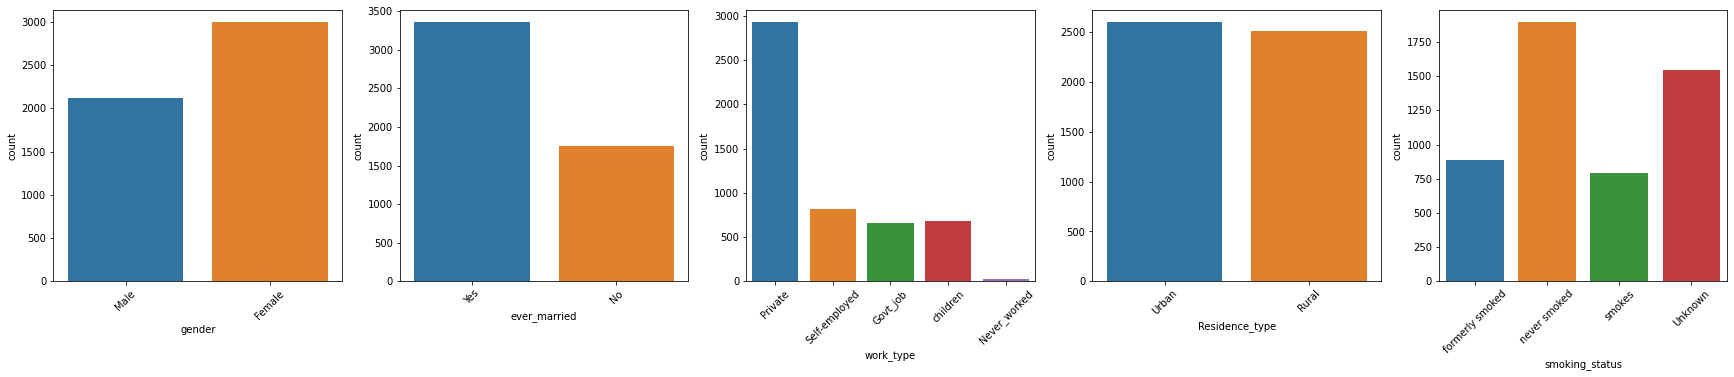

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0

for a in categorical_list:
  label=list(stroke[a].unique())
  sns.countplot(x=a,data=stroke,ax=ax[b])
  ax[b].set_xticklabels(label,rotation=45)
  b=b+1
;

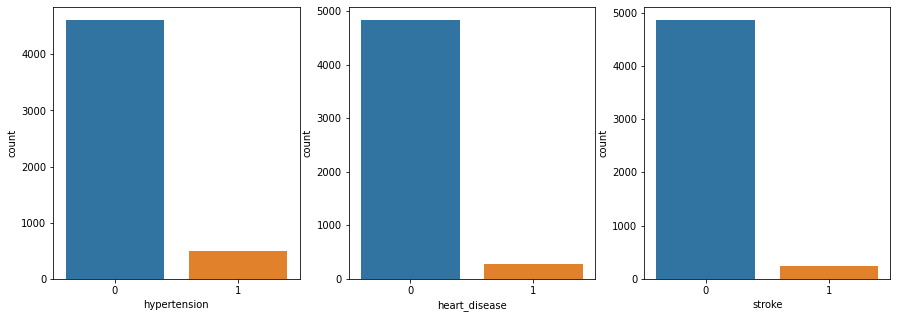

In [ ]:
fig, ax = plt.subplots(1,len(binary_list),figsize=(15,5))
b=0

for a in binary_list:
  label=list(stroke[a].unique())
  sns.countplot(x=a,data=stroke,ax=ax[b])
  b=b+1

It turns out our data is quite unbalanced, with very few observations labeled stroke. It should be noticed that we need either upsample or downsample our data when doing machine learning.



Also, we have witnessed some variables like work type and smoking type that are unbalanced among the different levels. We need to pay attention to set a proper base level for further modeling work.

***Use* histgram to exam the numeric data.**




''

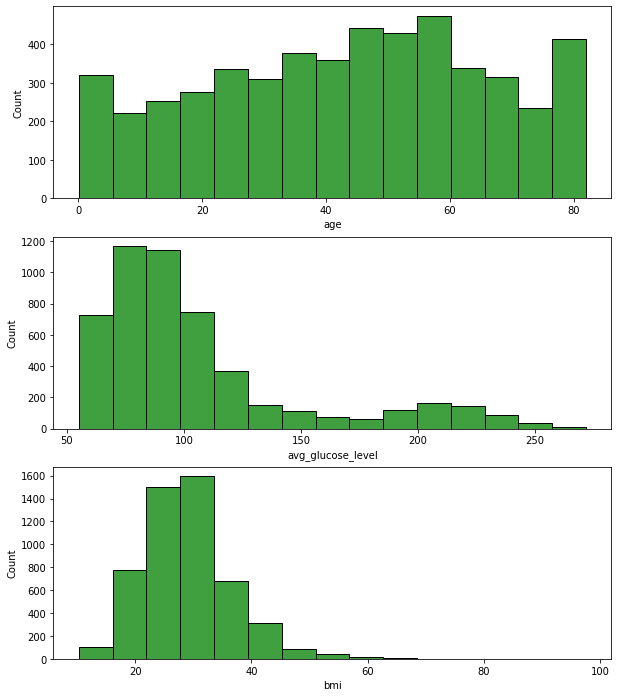

In [ ]:
floated = (stroke.dtypes == "float")
floated_list = list(floated[floated].index)

fig, ax = plt.subplots(len(floated_list),1,figsize=(10,12))
b=0
for a in floated_list:
  sns.histplot(stroke[a],bins=15,ax=ax[b],color='g')
  b=b+1
;

The average glucose level is heavily right-skewed with a long tail, indicating a logarithm to deal with the situation. Also, for BMI, it looks like we have an outlier, which could distort our modeling result in the future.

#### 3.2 Bivariate Analysis

##### Examining relationship with targeted variables 
Since our target variable is stroke, we will examine the relationships of predicted variables with the target variable.

''

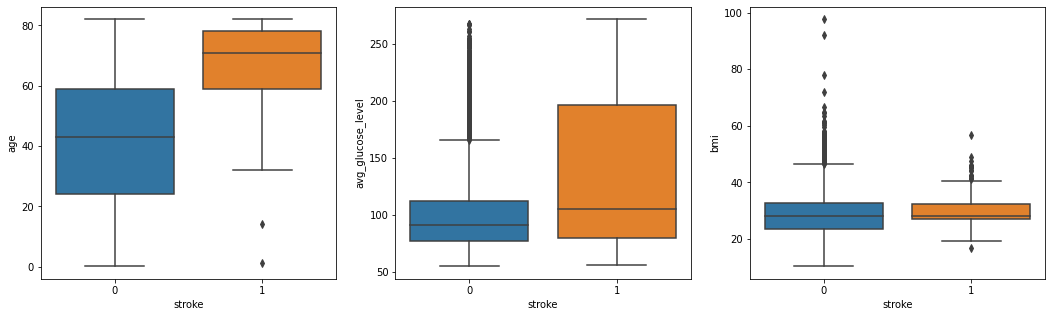

In [ ]:
fig, ax = plt.subplots(1,len(floated_list),figsize=(18,5))
b=0
for a in floated_list:
  sns.boxplot(data=stroke,x='stroke',y=a,ax=ax[b])
  b=b+1
;

We can see that people with a higher risk of stroke would probably be older or have a higher glucose level or slightly higher BMI.
_(PS: BMI doesn't see a very obvious pattern is probably due to our method of dealing with missing value)_

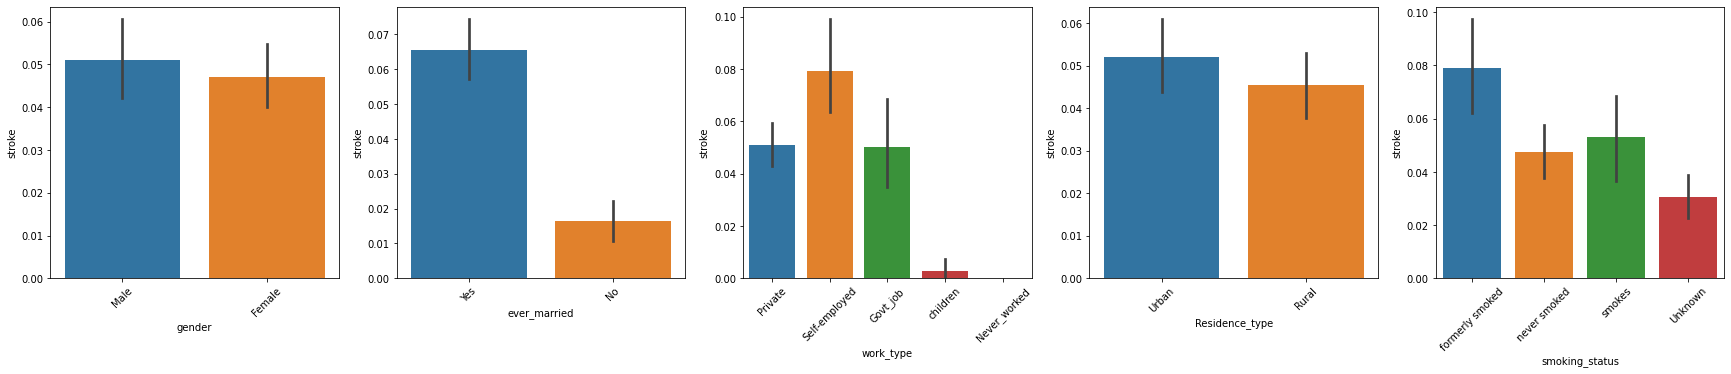

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.barplot(data=stroke, y ='stroke', x=a , ax=ax[b])
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1


Some interesting trends can be discovered:
1. Males have a higher percentage of stroke than females.
2. Marriage seems to increase the risk of stroke.
3. Self-employed people have a higher percentage of stroke.
4. Urban residents have a slightly higher risk of stroke than rural residents.
5. Smoking contributes to stroke. The more people smoke the higher possibility of getting a stroke.

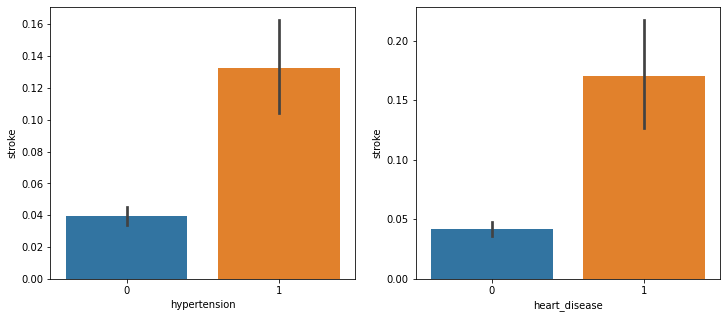

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.barplot(data=stroke, y ='stroke', x='hypertension',ax=ax[0])
sns.barplot(data=stroke, y ='stroke', x='heart_disease',ax=ax[1])

Hypertension and heart_diesease can enormously increase the possibility of stroke.

##### Examing the interactions between variables that could affect targeted variables

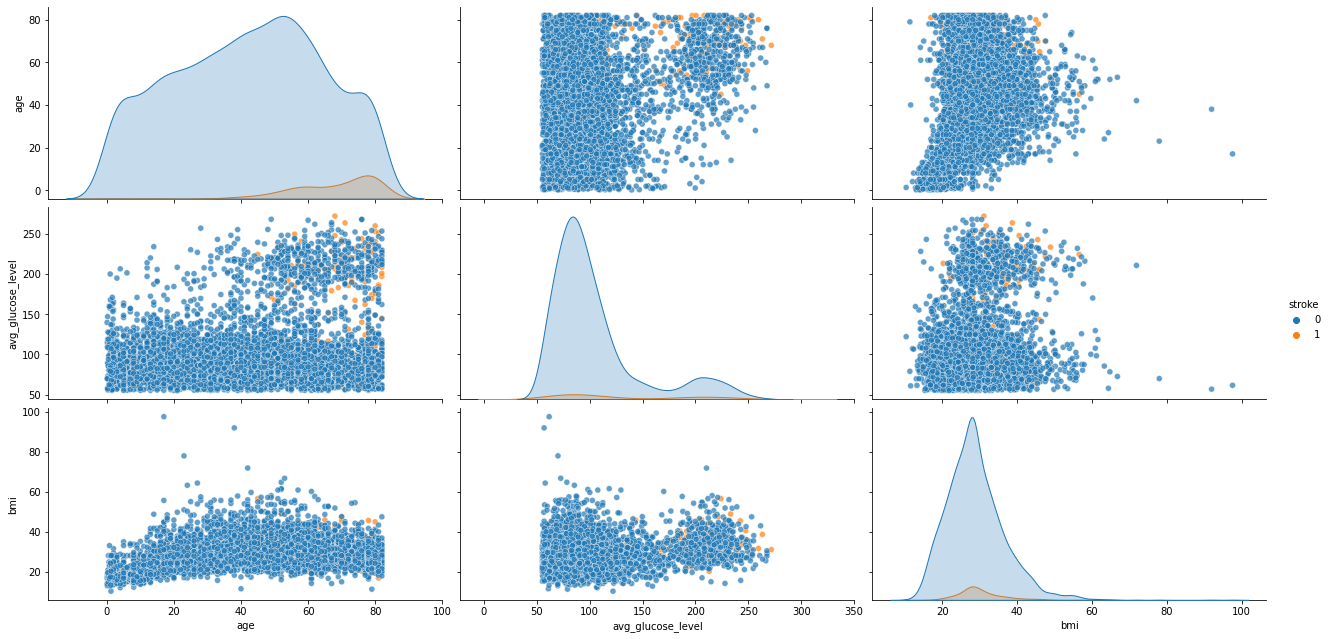

In [ ]:
sns.pairplot(stroke,hue='stroke',vars=floated_list,plot_kws={'alpha':0.7},height=3,aspect=2);

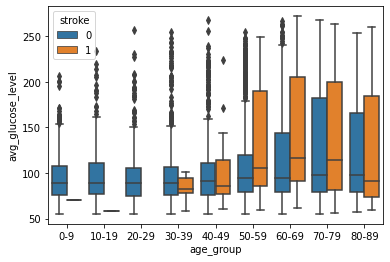

In [ ]:
age_group = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89']
stroke['age_group'] = pd.cut(stroke.age, range(0, 91, 10), right=False, labels=age_group)
sns.boxplot(data=stroke, x = 'age_group', y = 'avg_glucose_level', hue='stroke')


We can see the synergistic effect of glucose level and age (Row 2, Column 1)of the pairplot. The stroke happens where people are old and with a high glucose level. We can create age bands to closely exam the interaction between age and glucose level. The stroked people who are between 30-49 tend to have a lower glucose level than those who don't have a stroke. But people over 50 who have stroke tend to have a higher glucose level.

''

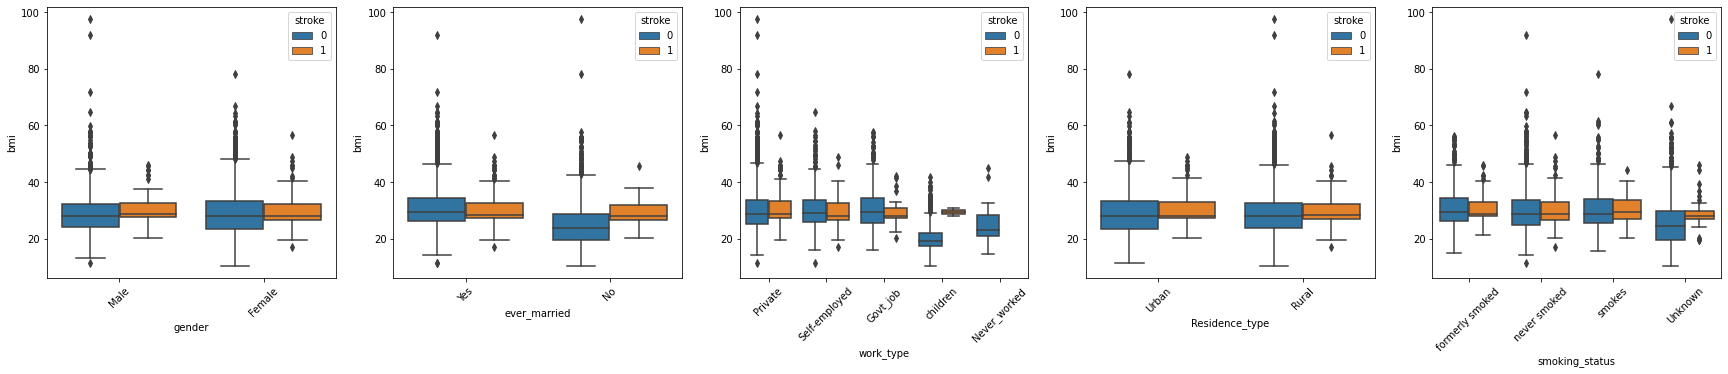

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.boxplot(data=stroke,  x = a, y = 'bmi', hue='stroke', ax=ax[b])
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1
;

1. There is a potential interaction between BMI and marriage status. We know high BMI contributes to stroke risk. In the second plot, this patent is followed when people are not married. But when people are married, the people who have a stroke don't have a higher BMI. Therefore, some interaction between BMI and marriage status can offset the BMI's effect.
2. There is a potential interaction between BMI and work_type. We know that BMI contributes to stroke. Yet, people self-employed or working in a government job who have a stroke tend to have lower BMI than those who don't have a stroke. Thus, another interaction between work type and BMI probably exists.

''

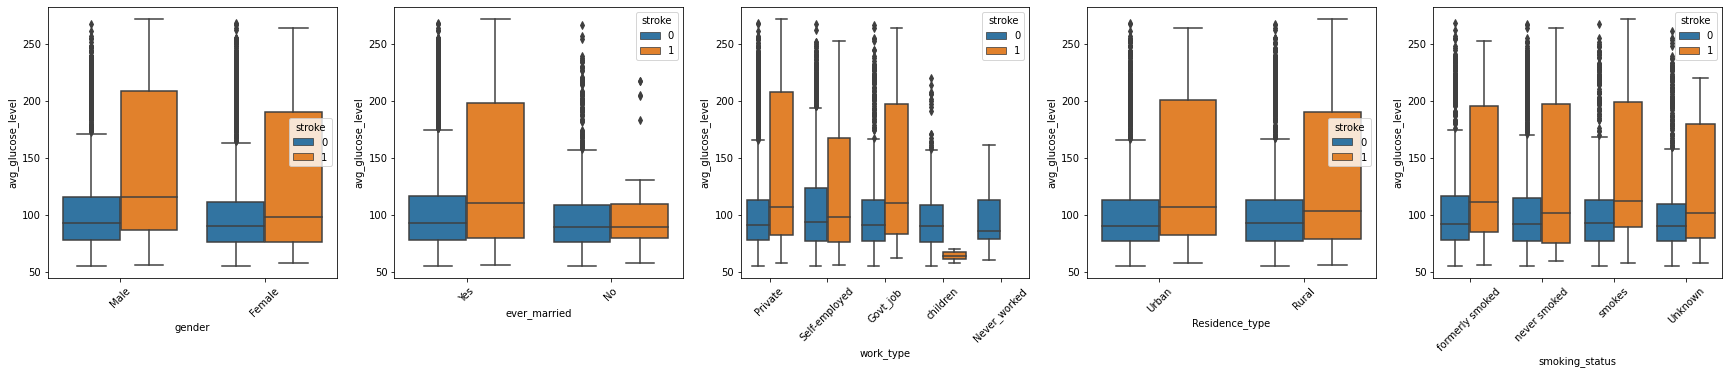

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.boxplot(data=stroke,  x = a, y = 'avg_glucose_level', hue='stroke', ax=ax[b])
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1
;

We find a potential interaction between marriage status and glucose level. We know high glucose contributes to stroke. It is interesting to discover that those who have a stroke don't have high glucose levels when people are not married. Thus, there is probably some interaction between glucose level and marital status.

### 3.3 Correlation analysis

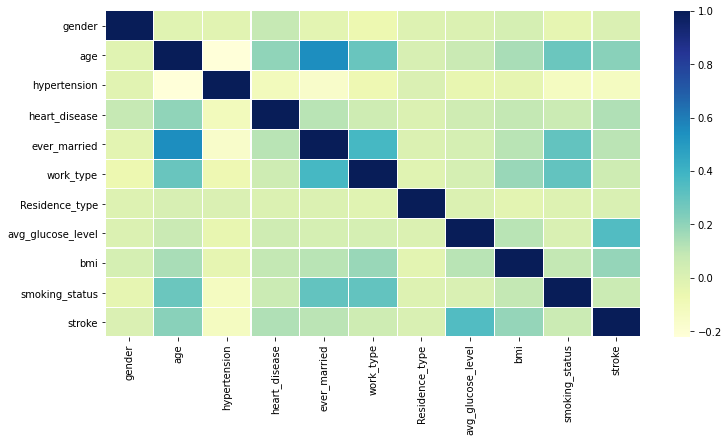

In [ ]:
plt.figure(figsize=(12, 6))
stroke_corr=stroke.drop(['id','age_group'],axis=1, inplace=True)
corr = stroke.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

In the end, we also need to exam the correlation between the predicted variables to avoid the overfitting problem for further modeling. Age and marital status have a high correlation. Marriage status also has a high correlation with work type. Other correlations seem to lower than 0.4, which probably will not affect too much.

# 4. Modelling
Our target variable indicates whether people have a stroke or not.It is a binary variable. For binary variable as target, supervised models such logistic regression, Guassian NB, KNN and random forest and Xgboost are suitable for this kind of problems. We will apply three potential models in our analysis.


1.   Logistic Regression
2.   Guassian Naive Bayes
3.   KNN



#### 4.1 Convert categorical variables to dummy variables

Firstly, we need to convert the categorical variables to dummy variables.

In [ ]:
dummies = pd.get_dummies(stroke, columns=['smoking_status','gender','Residence_type','ever_married','work_type'])
dummies.describe() # dropped Unknown

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738,0.302212,0.173028,0.370327,0.154433,0.586025,0.413975,0.491877,0.508123,0.343707,0.656293,0.128597,0.004306,0.572323,0.160305,0.134469
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340,0.459261,0.378308,0.482939,0.361399,0.492592,0.492592,0.499983,0.499983,0.474991,0.474991,0.334786,0.065486,0.494790,0.366925,0.341188
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Then we drop the additional repeated columns. Here, we drop the majority groups instead. This method can be considered as setting base level to majority groups It helps reduce volatility caused by spare data at minority level.

In [ ]:
dummies.drop(['smoking_status_never smoked','gender_Female','Residence_type_Urban','ever_married_Yes','work_type_Private'],axis=1, inplace=True)
dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes,gender_Male,Residence_type_Rural,ever_married_No,work_type_Govt_job,work_type_Never_worked,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,0,0,0,0
1,61.0,0,0,202.21,28.1,1,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,0,0,1,1,0,0,0,0,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,0,0,0,0,0
4,79.0,1,0,174.12,24.0,1,0,0,0,0,1,0,0,0,1,0


As we discovered earlier, we found out some interactions between variables. To discover the interactions, we created new variables as below to fit into the model.
1. Interactions between age and glucose
2. Interactions between BMI and marriage
3. Interactions between BMI and work types
4. Interactions between glucose and marriage

All the interactions can be visualized in our bivariate analysis.


In [ ]:
dummies['age*glucose']=dummies['age']*dummies['avg_glucose_level']  #interactions between age and glucose
dummies['bmi*married']=dummies['bmi']*dummies['ever_married_No']        # interactions between bmi and marrige
dummies['bmi*Never_worked']=dummies['bmi']*dummies['work_type_Never_worked']  #i interactions between bmi and work types
dummies['bmi*Govt_job']=dummies['bmi']*dummies['work_type_Govt_job']
dummies['bmi*Self-employed']=dummies['bmi']*dummies['work_type_Self-employed']
dummies['bmi*children']=dummies['bmi']*dummies['work_type_children']
dummies['glucose*marriage']=dummies['avg_glucose_level']*dummies['ever_married_No'] #i interactions between glucose and marriage

### 4.2 Downsampling
The stroke and no stroke data are highly imbalanced. To make the dataset balanced, we will use the downsampling method to deal with the problem. The reason that we choose downsampling is to speed up the calculation.Because the analysis is to focus on those who have stroke risk(minority group), deleting some major group data won't cause big problem as all stroke data are captured.

In [ ]:
stroke_majority = dummies[dummies["stroke"]==0]
stroke_minority = dummies[dummies["stroke"]==1]

stroke_majority_upsampled = resample(stroke_majority, replace=True,     # sample with replacement
                 n_samples=len(stroke_minority["stroke"]),    # to match majority class
                 random_state=123) # reproducible result
stroke = pd.concat([stroke_minority,stroke_majority_upsampled])

#Let's check how the data looks like after oversampling
print("Before OverSampling, counts of stroke data: {}".format(sum(stroke_minority['stroke']==1)))
print("Before OverSampling, counts of no stroke data: {} \n".format(sum(stroke_majority ['stroke']==0)));

print("After OverSampling, counts of stroke data: {}".format(sum(stroke['stroke']==1)))
print("After OverSampling, counts of no stroke data: {} \n".format(sum(stroke['stroke']==0)));

Before OverSampling, counts of stroke data: 249
Before OverSampling, counts of no stroke data: 4860 

After OverSampling, counts of stroke data: 249
After OverSampling, counts of no stroke data: 249 



Then, we standardize the data to avoid the convergence problem of logistic regression. 

In [ ]:
X = stroke.drop('stroke', axis = 1)
X_scaled = preprocessing.scale(X)
X_scaled= pd.DataFrame(X_scaled,columns=X.columns)
y= stroke['stroke']

We split the data into train set and test set.

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,y,test_size=0.4,random_state=833)

### 4.3 Logistic Regression

First, we fit into logistic regression. With tuning the hyperparameters, the best parameters are when C=0.0518, penality = l1.

In [ ]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(xtrain,ytrain)
logreg_cv.best_params_

{'C': 0.05179474679231213, 'penalty': 'l1'}

In [ ]:
ypred = logreg_cv.predict(xtest)
y_pred_prob = logreg_cv.predict_proba(xtest)[:,1]
TP = sum((ytest == 1) & (ypred == 1))
P = sum(ytest == 1)
TN = sum((ytest == 0) & (ypred == 0))
N = sum(ytest == 0)
specificity = TN/N
sensitivity = TP/P
result_full_logistic={"Var":'NA',"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":specificity,"sensitivity":sensitivity}
result_full_logistic

{'AUC': 0.8228822882288228,
 'Accuracy': 0.755,
 'Var': 'NA',
 'sensitivity': 0.801980198019802,
 'specificity': 0.7070707070707071}

With all variables being trained, the test set can get AUC 0.823. The sensitivity and specificity are 0.8019 and 0.7071, a little more favor of the stroke group at the expense of less accuracy for the non-stroke group. 

Then, we apply backward selection method to do variable selection. Backward selection means removing one variable each time to see whether deleting certain variables will generate better prediction power.

In [ ]:
Var=xtrain.columns
direction={"Var":[],"AUC":[],"Accuracy":[],"spcificity":[],"sensitivity":[]}
result = pd.DataFrame(direction)

for a in Var:
  X_train_scaled2=xtrain
  X_test2=xtest
  X_dropped= X_train_scaled2.drop(a, axis=1)
  X_test_dropped=X_test2.drop(a, axis=1)
  logreg = LogisticRegression(solver='liblinear') 
  c_space = np.logspace(-5, 8, 15)
  param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
  logreg_cv = GridSearchCV(logreg, param_grid, cv=5) 
  logreg_cv.fit(X_dropped, ytrain) 
  ypred = logreg_cv.predict(X_test_dropped)
  y_pred_prob = logreg_cv.predict_proba(X_test_dropped)[:,1]
  fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
  TP = sum((ytest == 1) & (ypred == 1))
  P = sum(ytest == 1)
  TN = sum((ytest == 0) & (ypred == 0))
  N = sum(ytest == 0)
  specificity = TN/N
  sensitivity = TP/P
  result = result.append({"Var":a,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":TN/N,"sensitivity":TP/P}, ignore_index = True)

print(result);

                               Var       AUC  ...  sensitivity  specificity
0                              age  0.819482  ...     0.673267     0.808081
1                     hypertension  0.808881  ...     0.722772     0.737374
2                    heart_disease  0.819682  ...     0.752475     0.737374
3                avg_glucose_level  0.823482  ...     0.752475     0.727273
4                              bmi  0.826183  ...     0.732673     0.737374
5           smoking_status_Unknown  0.818782  ...     0.732673     0.727273
6   smoking_status_formerly smoked  0.814581  ...     0.732673     0.737374
7            smoking_status_smokes  0.822882  ...     0.801980     0.707071
8                      gender_Male  0.811881  ...     0.712871     0.717172
9             Residence_type_Rural  0.822982  ...     0.801980     0.707071
10                 ever_married_No  0.822882  ...     0.801980     0.707071
11              work_type_Govt_job  0.822882  ...     0.801980     0.707071
12          

In [ ]:
Var=X.columns

We then optimize the AUC when removing BMI and average glucose level. This is generated from backward selection. The AUC now is 0.827, with a sensitivity of 0.7525 and specificity of 0.7475.

In [ ]:
Var=Var.drop(['bmi','avg_glucose_level'])
X_dropped_train=xtrain[Var]
X_dropped_test=xtest[Var]
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_dropped_train, ytrain)
ypred = logreg_cv.predict(X_dropped_test)
y_pred_prob = logreg_cv.predict_proba(X_dropped_test)[:,1]
TP = sum((ytest== 1) & (ypred == 1))
P = sum(ytest== 1)
TN = sum((ytest== 0) & (ypred == 0))
N = sum(ytest== 0)
specificity = TN/N
sensitivity = TP/P
result_dropped={"Var":Var,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"spcificity":specificity,"sensitivity":sensitivity}
result_dropped

{'AUC': 0.8274827482748275,
 'Accuracy': 0.75,
 'Var': Index(['age', 'hypertension', 'heart_disease', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_smokes',
        'gender_Male', 'Residence_type_Rural', 'ever_married_No',
        'work_type_Govt_job', 'work_type_Never_worked',
        'work_type_Self-employed', 'work_type_children', 'age*glucose',
        'bmi*married', 'bmi*Never_worked', 'bmi*Govt_job', 'bmi*Self-employed',
        'bmi*children', 'glucose*marriage'],
       dtype='object'),
 'sensitivity': 0.7524752475247525,
 'spcificity': 0.7474747474747475}

### 4.4 Gaussian NB 

We then tried the Gaussian NB model. We also tuned the hyperparameters of Gaussian NB and first applied all the variables into the training, and made backward selection. 

In [ ]:
gs = GaussianNB() 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gs, 
                 param_grid=params_NB, 
                 cv=5,     
                 scoring='accuracy') 
gs_NB.fit(xtrain, ytrain);

In [ ]:
ypred = gs_NB.predict(xtest)
y_pred_prob = gs_NB.predict_proba(xtest)[:,1]
TP = sum((ytest == 1) & (ypred == 1))
P = sum(ytest == 1)
TN = sum((ytest == 0) & (ypred == 0))
N = sum(ytest == 0)
specificity = TN/N
sensitivity = TP/P
result_full={"Var":'NA',"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":specificity,"sensitivity":sensitivity}
result_full

{'AUC': 0.7983798379837983,
 'Accuracy': 0.725,
 'Var': 'NA',
 'sensitivity': 0.8316831683168316,
 'specificity': 0.6161616161616161}

When all the variables are included, the AUC of Gaussian NB is only 0.7984, much less than the AUC of logistic regression.

In [ ]:
Var=X.columns
direction={"Var":[],"AUC":[],"Accuracy":[],"spcificity":[],"sensitivity":[]}
result = pd.DataFrame(direction)

for a in Var:
  X_train_scaled2=xtrain
  X_test2=xtest
  X_dropped= X_train_scaled2.drop(a, axis=1)
  X_test_dropped=X_test2.drop(a, axis=1)
  gs = GaussianNB() 
  params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
  gs_NB = GridSearchCV(estimator=gs, 
                 param_grid=params_NB, 
                 cv=5,     
                 scoring='accuracy') 
  gs_NB.fit(X_dropped, ytrain) 
  ypred = gs_NB.predict(X_test_dropped)
  y_pred_prob = gs_NB.predict_proba(X_test_dropped)[:,1]
  fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
  TP = sum((ytest == 1) & (ypred == 1))
  P = sum(ytest == 1)
  TN = sum((ytest == 0) & (ypred == 0))
  N = sum(ytest == 0)
  specificity = TN/N
  sensitivity = TP/P
  result = result.append({"Var":a,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":TN/N,"sensitivity":TP/P}, ignore_index = True)

print(result);


                               Var       AUC  ...  sensitivity  specificity
0                              age  0.768777  ...     0.732673     0.616162
1                     hypertension  0.787379  ...     0.841584     0.575758
2                    heart_disease  0.793079  ...     0.900990     0.525253
3                avg_glucose_level  0.808981  ...     0.881188     0.595960
4                              bmi  0.798680  ...     0.821782     0.626263
5           smoking_status_Unknown  0.798880  ...     0.831683     0.636364
6   smoking_status_formerly smoked  0.798080  ...     0.861386     0.585859
7            smoking_status_smokes  0.798080  ...     0.831683     0.616162
8                      gender_Male  0.798480  ...     0.831683     0.616162
9             Residence_type_Rural  0.797680  ...     0.821782     0.626263
10                 ever_married_No  0.802280  ...     0.831683     0.646465
11              work_type_Govt_job  0.800680  ...     0.841584     0.616162
12          

In [ ]:
Var=X.columns

In [ ]:
Var=Var.drop(['avg_glucose_level'])
X_dropped_train=xtrain[Var]
X_dropped_test=xtest[Var]
gs = GaussianNB() 
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gs, 
                 param_grid=params_NB, 
                 cv=5,     
                 scoring='accuracy') 
gs_NB.fit(X_dropped_train, ytrain) 
ypred = gs_NB.predict(X_dropped_test)
y_pred_prob = gs_NB.predict_proba(X_dropped_test)[:,1]
TP = sum((ytest == 1) & (ypred == 1))
P = sum(ytest == 1)
TN = sum((ytest == 0) & (ypred == 0))
N = sum(ytest == 0)
specificity = TN/N
sensitivity = TP/P
result_drop={"Var":Var,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":specificity,"sensitivity":sensitivity}
result_drop

{'AUC': 0.808980898089809,
 'Accuracy': 0.74,
 'Var': Index(['age', 'hypertension', 'heart_disease', 'bmi', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_smokes',
        'gender_Male', 'Residence_type_Rural', 'ever_married_No',
        'work_type_Govt_job', 'work_type_Never_worked',
        'work_type_Self-employed', 'work_type_children', 'age*glucose',
        'bmi*married', 'bmi*Never_worked', 'bmi*Govt_job', 'bmi*Self-employed',
        'bmi*children', 'glucose*marriage'],
       dtype='object'),
 'sensitivity': 0.8811881188118812,
 'specificity': 0.5959595959595959}

Even when variable selection, the AUC can only be improved to 80% with a sensitivity of 0.8812 and specificity of 0.60.

In general, the Gaussian Naive Bayes Model doesn't give a better prediction on the test set compared to the logistic model. Although the sensitivity is 0.8812, it is at the cost of predicting more non-stroke people to the stroke group. 

### 4.5 KNN

KNN model are also considered. We tried different n_neighbors in tunning and the best parameter for n_neighbors is 25. 

In [ ]:

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(xtrain, ytrain)
knn_cv.best_params_

{'n_neighbors': 25}

In [ ]:
ypred = knn_cv.predict(xtest)
y_pred_prob = knn_cv.predict_proba(xtest)[:,1]
TP = sum((ytest == 1) & (ypred == 1))
P = sum(ytest == 1)
TN = sum((ytest == 0) & (ypred == 0))
N = sum(ytest == 0)
specificity = TN/N
sensitivity = TP/P
result_drop={"Var":Var,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"specificity":specificity,"sensitivity":sensitivity}
result_drop

{'AUC': 0.7817781778177818,
 'Accuracy': 0.695,
 'Var': Index(['age', 'hypertension', 'heart_disease', 'bmi', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_smokes',
        'gender_Male', 'Residence_type_Rural', 'ever_married_No',
        'work_type_Govt_job', 'work_type_Never_worked',
        'work_type_Self-employed', 'work_type_children', 'age*glucose',
        'bmi*married', 'bmi*Never_worked', 'bmi*Govt_job', 'bmi*Self-employed',
        'bmi*children', 'glucose*marriage'],
       dtype='object'),
 'sensitivity': 0.6039603960396039,
 'specificity': 0.7878787878787878}

However, by applying all variables, KNN gives out the worst results compared to Logistic Regression and Gaussian NB in terms of AUC.

### 4.6 Final model selection (Logistic Model)

We then will choose Logistic Model for our final model because:
1. It gives higher predictive power than Gaussian NB and KNN in terms of AUC.
2. It gives more balanced results on specificity and sensitivity.
3. It is easier to interpret and communicate with other people comparing with Gaussian NB and KNN.

In [ ]:
Var=X.columns
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

In [ ]:
Var=Var.drop(['bmi','avg_glucose_level'])
X_dropped_train=xtrain[Var]
X_dropped_test=xtest[Var]
logreg = LogisticRegression(solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_dropped_train, ytrain)
ypred = logreg_cv.predict(X_dropped_test)
y_pred_prob = logreg_cv.predict_proba(X_dropped_test)[:,1]
TP = sum((ytest== 1) & (ypred == 1))
P = sum(ytest== 1)
TN = sum((ytest== 0) & (ypred == 0))
N = sum(ytest== 0)
specificity = TN/N
sensitivity = TP/P
result_dropped={"Var":Var,"AUC":roc_auc_score(ytest, y_pred_prob),"Accuracy":accuracy_score(ytest, ypred),"spcificity":specificity,"sensitivity":sensitivity}
result_dropped

{'AUC': 0.8274827482748275,
 'Accuracy': 0.75,
 'Var': Index(['age', 'hypertension', 'heart_disease', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_smokes',
        'gender_Male', 'Residence_type_Rural', 'ever_married_No',
        'work_type_Govt_job', 'work_type_Never_worked',
        'work_type_Self-employed', 'work_type_children', 'age*glucose',
        'bmi*married', 'bmi*Never_worked', 'bmi*Govt_job', 'bmi*Self-employed',
        'bmi*children', 'glucose*marriage'],
       dtype='object'),
 'sensitivity': 0.7524752475247525,
 'spcificity': 0.7474747474747475}

In [ ]:
best_logReg = logreg_cv.best_estimator_
logReg_coeff = pd.DataFrame({'feature_name': X_dropped_train.columns, 'model_coefficient': best_logReg.coef_.transpose().flatten()})
logReg_coeff 

,feature_name,model_coefficient
0,age,0.775830
1,hypertension,0.187280
2,heart_disease,0.362703
3,smoking_status_Unknown,0.061962
4,smoking_status_formerly smoked,0.171665
5,smoking_status_smokes,-0.043377
6,gender_Male,-0.104396
7,Residence_type_Rural,-0.059880
8,ever_married_No,-0.026597
9,work_type_Govt_job,0.016116


# 5. Findings
####In general, based on the coefficients in our Logistics Regression Model, we could see:
####Positive contribution to stroke risk :
1. Age is the largest contribution to stroke.
2. Hypertension increases the risk of stroke.
3. Heart disease also is a major factor in stroke.
4. Comparing to non-smokers, former smokers have a significant high contribution to stroke
5. Age and glucose interacting together can facilitate stroke risk.
6. Those who have a government job type have a slightly higher risk of stroke than those in the private sector.
7. If one person is married, a higher BMI will contribute to the stroke risk.

#### Negative contribution to stroke risk :
1. Male tends to have less stroke risk than female.
2. People who haven't married have less risk than those who married. And a non-married person with a higher glucose level has a slightly lower stroke risk.
3. Children with higher BMI are still less likely to have a stroke.
4. Individuals living in rural areas tend to have less risk of stroke than those living in suburban areas.
5. Self-employed people are less likely to have stroke comparing with those in the private sectors.

Appendix

Some other plots we did as part of the process but didn't find any relevant information.

''

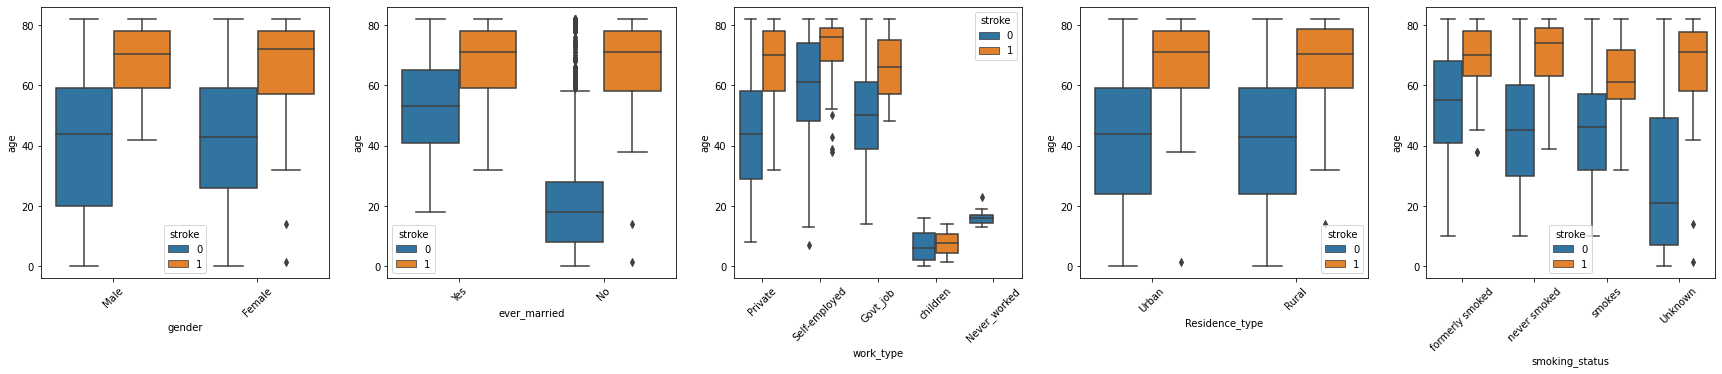

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.boxplot(data=stroke, x = a, y = 'age', hue='stroke', ax=ax[b])
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1
;

No potential interaction between age factors and other catergoical factors.

''

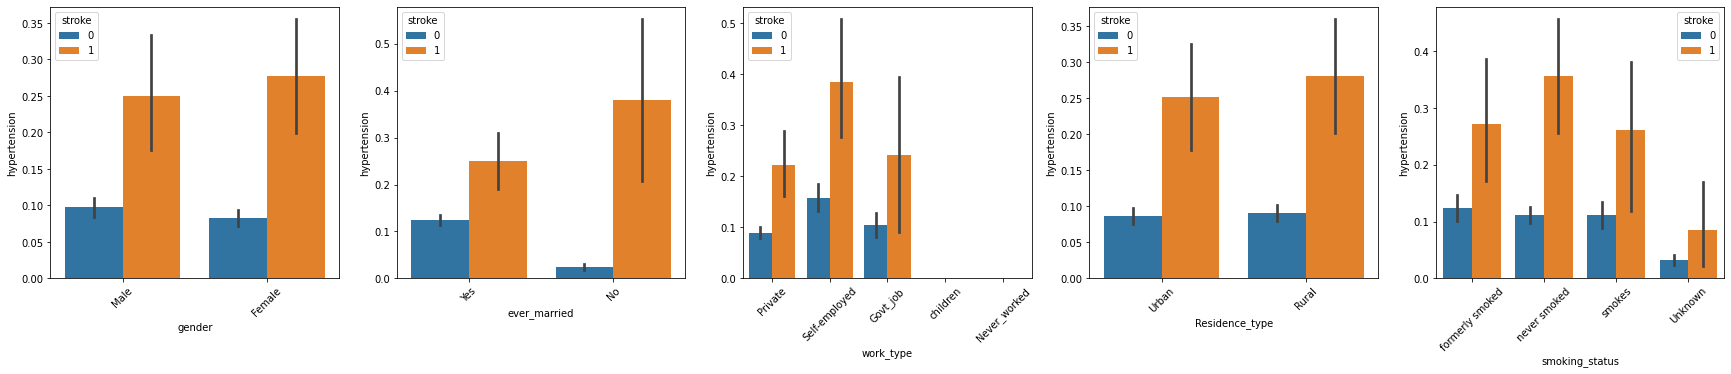

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.barplot(data = stroke, x =a, y='hypertension',ax=ax[b],hue='stroke')
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1
;

No potential interaction between hypertension and other catergoical factors.

''

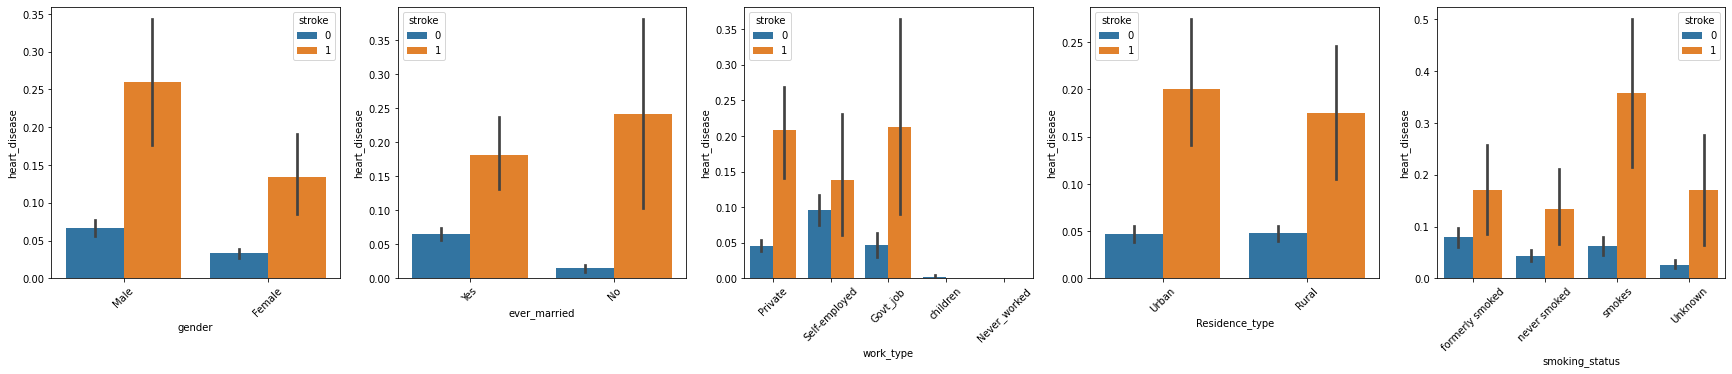

In [ ]:
fig, ax = plt.subplots(1,len(categorical_list),figsize=(30,5))
b=0
for a in categorical_list:
    label=list(stroke[a].unique())
    sns.barplot(data=stroke, x =a, y='heart_disease',ax=ax[b],hue='stroke')
    ax[b].set_xticklabels(label,rotation=45)
    b=b+1
;

No potential interaction between heart disease and other catergoical factors.